# 1. Война войной, а обед по расписанию!
### ЧТО ВЫ ПОЛУЧИТЕ В РЕЗУЛЬТАТЕ РАБОТЫ?

Cоздадите свою первую модель, основанную на алгоритмах машинного обучения.
Примете участие в соревновании на kaggle.
Поймёте, как правильно «готовить» данные, чтобы ваша модель работала лучше.

### ОРГАНИЗАЦИОННАЯ ИНФОРМАЦИЯ

### Что нужно сделать?
- разобраться с подробным описанием того, как будет организовано изучение модуля;

- зарегистрироваться в соревновании на kaggle;

- проанализировать baseline к соревнованию;

- следуя подсказкам в модуле, обработать оставшиеся признаки и подготовить собственное решение;

- победить в соревновании :)

### Критерии оценки прохождения модуля:
- вы участвовали в соревновании;
- вы сдали ноутбук со своим решением ментору на проверку и получили обратную связь по нему.

### ЧЕМ МЫ БУДЕМ ЗАНИМАТЬСЯ?
- В этом модуле вы попробуете решить свой первый настоящий кейс и создадите первую модель, использующую алгоритмы машинного обучения.

Не пугайтесь, вам не придётся совершать академический подвиг и изучать машинное обучение в экстремально короткие сроки! На самом деле код для создания и обучения модели мы вам предоставим в готовом виде, и этот код будет довольно простым: в нём не будет предусмотрен подбор параметров и тонкая настройка модели (всему этому вы научитесь позже, в курсе по ML). Пока ваша задача будет состоять в том, чтобы качественно подготовить данные для обучения модели. Скоро вы убедитесь, что тщательная очистка данных и генерация новых признаков (Feature Engineering) способны повысить точность модели в два и более раз, и владение этими навыками играют в машинном обучении не меньшую роль, чем умение выбрать алгоритм и настроить модель.

Итак, факт остаётся фактом: свою первую модель вы создадите уже через пару недель, а после этого, в следующие две недели, используете свои наработки для участия в первом в вашей жизни соревновании на платформе kaggle.com.

Последующие разделы модуля помогут вам сориентироваться в данных, но не являются обязательными к прохождению. Если вы чувствуете в себе силы, можете сразу приступать к соревнованию на kaggle. Ссылку на соревнование вы найдёте в разделе "6. Kaggle. Начало" этого модуля. Удачи!

### КАКОЙ КЕЙС РЕШАЕМ?
Представьте, что вы работаете DS в компании TripAdvisor. Одна из проблем компании — это нечестные рестораны, которые накручивают себе рейтинг. Одним из способов нахождения таких ресторанов является построение модели, которая предсказывает рейтинг ресторана. Если предсказания модели сильно отличаются от фактического результата, то, возможно, ресторан играет нечестно, и его стоит проверить.

Вам поставлена задача создать такую модель. Готовы приступить?

# 2. Разбираемся с данными
## ОРГАНИЗАЦИОННАЯ ИНФОРМАЦИЯ

### Что мы сделаем на этом шаге?
- Посмотрим на данные.

- Посмотрим, где у нас пропуски.

- Определим тип признаков.

### А ПРИ ЧЁМ ЗДЕСЬ ЕДА?

На самом деле всё предельно просто: в этом модуле вы будете работать с датасетом, содержащим сведения о 40 000 ресторанах Европы, а модель, которую вы будете обучать, должна будет предсказывать рейтинг ресторана по данным сайта TripAdvisor на основе имеющихся в датасете данных.

СКАЧАТЬ ФАЙЛ С ДАННЫМИ(https://lms.skillfactory.ru/assets/courseware/v1/c00e440dce1926e20bcf7b959cbeebbb/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/main_task_new.csv)

Первоначальная версия датасета состоит из десяти столбцов, содержащих следующую информацию:

- Restaurant_id — идентификационный номер ресторана / сети ресторанов;
- City — город, в котором находится ресторан;
- Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
- Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
- Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
- Price Range — диапазон цен в ресторане;
- Number of Reviews — количество отзывов о ресторане;
- Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
- URL_TA — URL страницы ресторана на TripAdvisor;
- ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [173]:
import pandas as pd

main_df = pd.read_csv('main_task_new.csv', encoding='utf-8')
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


# ТРЕНИРОВКА
Ответы на вопросы ниже помогут вам лучше сориентироваться в файле, а также покажут некоторые важные особенности, которые нужно будет учесть при создании модели.

# 2.1 Задание 1
Какие столбцы НЕ содержат пропущенных (None) значений?
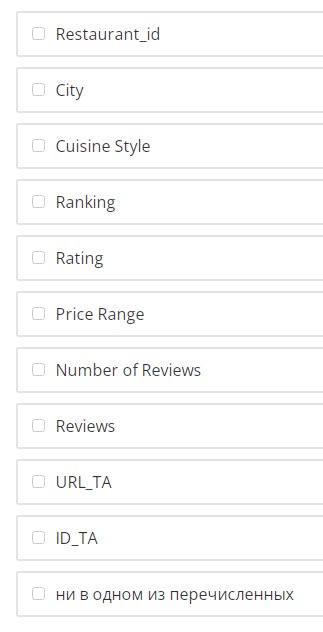

In [174]:
test = main_df.dropna(axis=1)
test.head()

,Restaurant_id,City,Ranking,Rating,Reviews,URL_TA,ID_TA
0,id_5569,Paris,5570.0,3.5,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,1537.0,4.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,353.0,4.5,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,3458.0,5.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,621.0,4.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


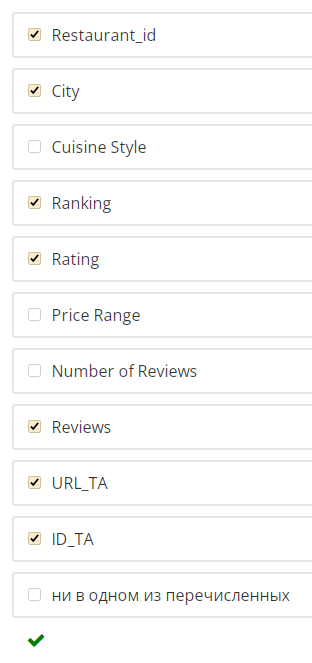

# 2.2 Задание 2
В каких столбцах данные хранятся в числовом формате?
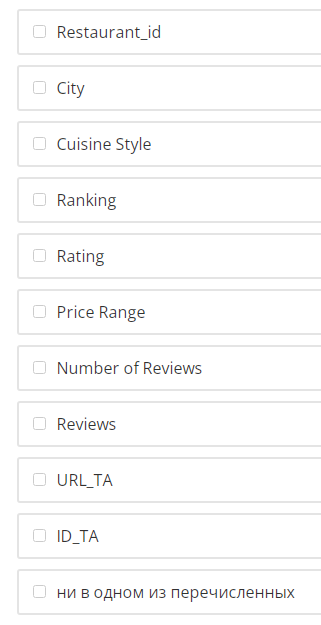

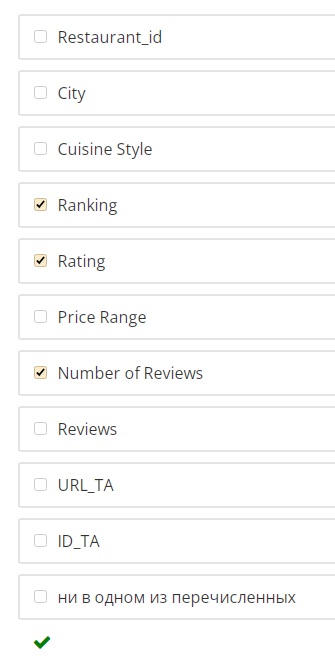

# 2.3 Задание 3
В каких столбцах хранящиеся данные представляют собой список?
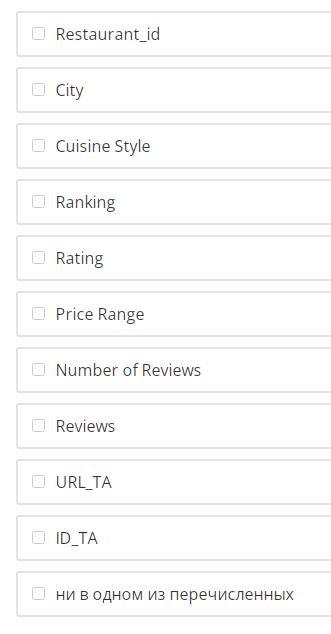

In [175]:
for i in main_df.columns:
    print(type(main_df[i][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>


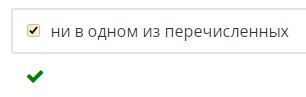

# 3. Машинное обучение для чайников
## ОРГАНИЗАЦИОННАЯ ИНФОРМАЦИЯ
### Что нужно сделать на этом шаге?
Создать свою первую модель, основанную на алгоритмах машинного обучения. Код для создания модели мы предоставим, но чтобы модель заработала, в неё нужно загрузить правильные данные. Приведение данных в нужный вид и будет вашей задачей.

### АЛИСА, ЭТО ПУДИНГ. ПУДИНГ, ЭТО АЛИСА
Ну что же, настал момент истины. Сейчас вы попробуете создать свою первую модель, работающую на основе одного из довольно мощных алгоритмов машинного обучения — RandomForestRegression.

Ноутбук с кодом для создания, обучения и тестирования модели можно скачать здесь(https://cms.skillfactory.ru/assets/courseware/v1/6f6569b6505892f53c50cb07282c33e5/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/your_first_model.ipynb).
Давайте вкратце ознакомимся с тем, что будет происходить с вашими данными после их загрузки в датафрейм:

### 1 РАЗДЕЛЕНИЕ ДАТАФРЕЙМА
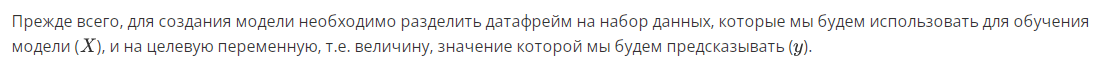
Далее каждый из полученных наборов мы делим на тренировочный (train, используется для обучения модели) и тестовый (test, используется для оценки точности модели). Такое деление осуществляется с помощью специального метода, входящего в состав библиотеки Scikit-Learn (sklearn). В параметрах метода мы указываем, какую часть исходного датафрейма нужно оставить для тестирования модели. В нашем коде эта часть составляет 25%, или 0.25.

In [176]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)  
X = main_df.drop(['Restaurant_id', 'Rating'], axis = 1)  
y = main_df['Rating']  

# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### 2 СОЗДАНИЕ, ОБУЧЕНИЕ И ТЕСТИРОВАНИЕ МОДЕЛИ
Сам процесс создания и тестирования модели занимает всего четыре строчки кода (при условии, что мы используем параметры по умолчанию):

In [177]:
# # Импортируем необходимые библиотеки:  
# from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
# from sklearn import metrics # инструменты для оценки точности модели  

# # Создаём модель  
# regr = RandomForestRegressor(n_estimators=100)  

# # Обучаем модель на тестовом наборе данных  
# regr.fit(X_train, y_train)  

# # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# # Предсказанные значения записываем в переменную y_pred  
# y_pred = regr.predict(X_test)  

Попробуйте запустить этот код. Что происходит? Мы видим сообщение об ошибке ValueError. Что-то явно пошло не по плану... Давайте попробуем разобраться в причинах произошедшего.

# 3.1 Вопрос для размышления
По какой причине во время обучения модели возникла ошибка Value Error?
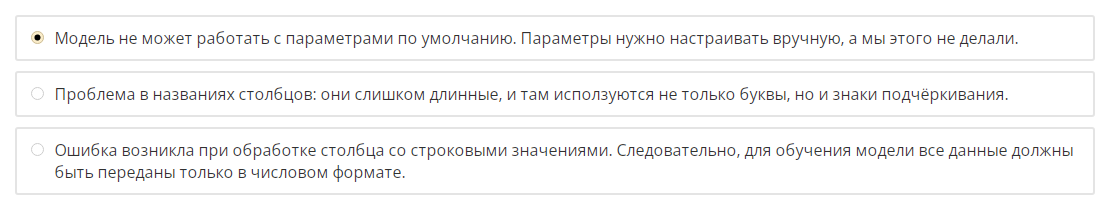

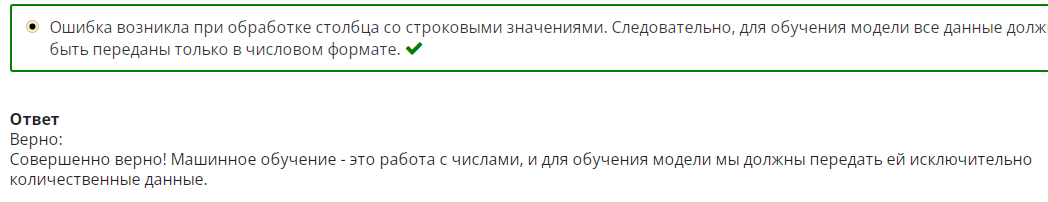

# В ЦИФРОВОМ КАЧЕСТВЕ

Итак, мы выяснили, что для корректной работы все данные в датафрейме, который вы будете использовать при обучении модели, должны быть в форматах int или float. Есть и ещё одно жёсткое ограничение: в столбцах не должно быть None-значений. В реальных проектах в индустрии используются разные подходы к работе с None-значениями. Если позволяют условия, то строки, содержащие неполные данные, просто удаляют из датасета. Однако в задачах по машинному обучению эта стратегия не используется никогда, потому что настоящие герои никогда не ищут лёгких путей :) Вместо каждого NaN вам нужно будет вычислить и поместить в ячейку максимально близкое к реальности значение.

Таким образом, чтобы код, отвечающий за обучение модели, заработал, мы должны использовать в нём датафрейм, содержащий только количественные признаки и не содержащий None-значений. 

На первом этапе для создания такого датафрейма давайте просто удалим столбцы, содержащие данные типа object, и заполним пропущенные значения (None или NaN) каким-то одним значением (нулём или средним арифметическим) для всего столбца.

Для выполнения этих операций вам понадобятся следующие методы библиотеки Pandas:
- drop(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) — метод для удаления ненужных строк и столбцов (обратите внимание, что в материалах данного модуля метод разрешается использовать только для удаления столбцов);
- fillna(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) — метод для заполнения пропущенных значений в столбце или во всём датафрейме.

После выполнения всех преобразований попробуйте заново запустить код уже с очищенными данными.

### КАК УЗНАТЬ, ЧТО МОЯ МОДЕЛЬ ХОРОШАЯ?

Прежде всего давайте скажем, что ваша модель в любом случае отличная, потому что она умеет обрабатывать данные и делать прогнозы по результатам этой обработки. Другой вопрос, насколько точны эти прогнозы и можно ли как-то управлять точностью предсказаний?

Для оценки точности прогнозов, сделанных моделью, мы будем использовать метрику (показатель), которая называется Mean Absolute Error, и представляет собой среднее абсолютное значение отклонения предсказанных значений от фактических:
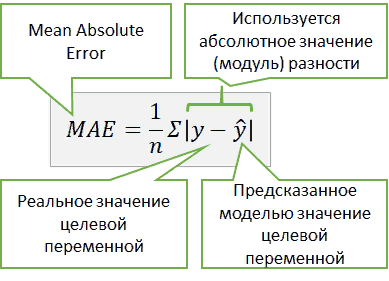
Иными словами, если у вас получился результат MAE = 0.5, то это значит, что модель при расчёте рейтинга ошибается в среднем на 0.5 баллов.

В последней ячейке ноутбука, который вы скачали, прилагается код для расчёта MAE:

In [178]:
# # Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются  
# # Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.  
# print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

Попробуйте применить этот код для вычисления MAE вашей модели. Какой результат у вас получился?

Автору этого модуля удалось очистить данные таким образом, что модель отработала с точностью MAE = 0.21. Как приблизиться к этому результату и по возможности улучшить его? Об этом вы узнаете на следующем шаге.

# Задание 3.1
Какое значение метрики MAE вам удалось получить на этом этапе?

In [179]:
import numpy as np
import pandas as pd

main_df = pd.read_csv('main_task_new.csv', encoding='utf-8')
display(main_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


None

In [180]:
# отбираем данные типа float64
copy_df = main_df.select_dtypes(include=['float64'])
mean = copy_df['Number of Reviews'].mean()
median = copy_df['Number of Reviews'].median()
copy_df['Number of Reviews'].fillna(mean, inplace=True)

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)  
X = copy_df.drop(['Rating'], axis = 1)  
y = copy_df['Rating']  

# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  

# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  

# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  


# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются  
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.  

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

D:\Programs\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


MAE: 0.4322019450577201


# 4. Сделайте с этим что-нибудь!
## ОРГАНИЗАЦИОННАЯ ИНФОРМАЦИЯ
### Что нужно сделать на этом шаге?

Повысить точность прогнозов, которые делает модель, с помощью более тщательной подготовки данных. При подготовке датасета нужно будет не только избавиться от пропущенных (None) значений и нечисловых признаков, но и сгенерировать новые признаки (добавить в датафрейм новые столбцы) на основе информации, уже содержащейся в данных.

### А ЧТО ДЕЛАТЬ-ТО?
С одной стороны, всё просто. Задачу, которая стоит перед вами, можно свести к трём пунктам:
1. Удалить из датафрейма столбцы, данные в которых представлены не числами (это вы уже сделали, и нужно просто повторить знакомые действия, но в этот раз выполнить данный шаг в последнюю очередь).
2. Избавиться от пропущенных (None) значений (на предыдущем шаге мы делали это самым грубым из всех возможных способов; сейчас попробуем подойти к процессу более гибко).
3. Создать новые столбцы с данными, используя для этого информацию, содержащуюся в других столбцах датафрейма (например, можно добавить столбец, сообщающий, сколько дней прошло со дня публикации последнего отзыва, отображённого на сайте).

### ⛔ С другой стороны, в этом задании масса подводных камней.
#### Строковые данные
В исходном наборе данных всего три столбца содержат числовые данные, причём один из этих столбцов — это целевая переменная, значение которой должна предсказывать наша модель. Так что просто удалить все object-значения и считать задачу выполненной не получится. Для создания качественной модели нам сначала придётся очень основательно поработать со строковыми данными и извлечь из них как можно больше информации, которую можно представить в числовом виде.
#### Пропущенные значения
Мы уже говорили о том, что в задачах по машинному обучению принято не удалять строки с пустыми значениями, а заполнять их максимально близкими к реальности данными. Как найти такие данные — большой вопрос, требующий не только знания синтаксиса, но и креативности, изобретательности, хорошего понимания контента, а иногда ещё и интуиции.
#### Новые признаки
Это, пожалуй, самая сложная, но и самая интригующая, увлекательная и творческая часть работы на данном шаге. Создание новых признаков (Feature Engineering) потребует от вас не только хорошего владения разными библиотеками Python, но и способность вникать в контент, умение подключать к работе интуицию, творческий подход и готовность к экспериментам.

## Попробуем?
### ПОДСКАЗКИ БЕЗ ПОДСКАЗОК
По условию нашего курса при выполнении этого задания у каждого студента должен получиться свой уникальный датафрейм, содержащий уникальный набор признаков. Иными словами, мы не стремимся привести всех к единому результату и одинаковому «единственно правильному» набору признаков. В то же время у нас есть определённое представление о том, какие признаки точно можно сгенерировать на основе набора данных, который вы получили для работы.

Ниже мы разместили несколько вопросов, для ответов на которые вам нужно будет создать столбцы с теми самыми числовыми признаками, которые в дальнейшем могут быть полезны при обучении модели. Отвечать на них не обязательно, но проработав эти вопросы, вам будет проще понять, какие признаки можно извлечь из данных.

### Для удобства мы также предлагаем вам список ссылок на методы, которые наверняка понадобятся при работе с данными:
#### Библиотека Pandas:
- drop(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) — метод для удаления ненужных строк и столбцов (обратите внимание, что в материалах данного модуля метод разрешается использовать только для удаления столбцов);
- fillna(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) — метод для заполнения пропущенных значений в столбце или во всём датафрейме;
- isnull(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) — функция, позволяющая определить, содержит ли переменная или структура данных, переданная в качестве параметра, None-значения;
- apply(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) — метод, позволяющий применить заданную функцию ко всему датафрейму или к отдельному столбцу;
- unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) — метод для получения всех уникальных значений, встречающихся в заданном столбце.
#### Дополнительные модули:
- datetime(https://docs.python.org/3.7/library/datetime.html) — модуль для работы с датой и временем;
- re(https://docs.python.org/3.7/library/re.html) — модуль для работы с регулярными выражениями;
- requests(https://requests.kennethreitz.org/en/master/), BeautifulSoup(https://www.crummy.com/software/BeautifulSoup/), selenium(https://pypi.org/project/selenium/) — модули для парсинга данных.

# Загружаем данные

In [181]:
import numpy as np
import pandas as pd

main_df = pd.read_csv('main_task_new.csv', encoding='utf-8')
display(main_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


None

# 4.1 Вопросы о ценах
Сколько вариантов непустых значений встречается в столбце Price Range?

In [182]:
display(main_df['Price Range'].unique())

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

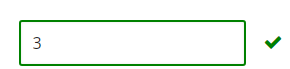

Как в датафрейме обозначается самый низкий уровень цен?
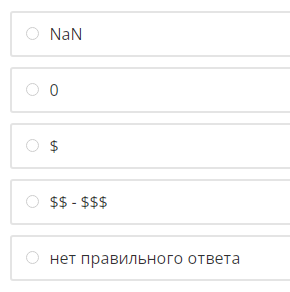

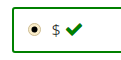

Как в датафрейме обозначается самый высокий уровень цен?
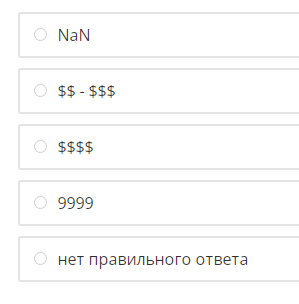

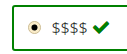

Сколько ресторанов относятся к среднему ценовому сегменту?

In [183]:
print(len(main_df['Price Range'][main_df['Price Range'] == '$$ - $$$']))

18412


# 4.2 Вопрос о городах
Сколько городов представлено в наборе данных?

In [184]:
display(len(main_df['City'].unique()))

31

# 4.3 Вопросы о кухнях

преобразовать столбец Cuisine Style из строки в массив

In [185]:
import re
def to_list(row):
    pattern = re.compile(r'\[|\"|\'|\]')
    if isinstance(row, str):
        row = re.sub(pattern, '', row).split(', ')
    return row

def count(name_column):
    cuisines = {}
    for row in main_df[name_column]:
        if row is not np.nan:
            for i in row:
                if i in cuisines.keys():
                    cuisines[i] += 1
                else:
                    cuisines[i] = 1

    return cuisines

def max_count(count_dict):
    max_value = 0
    key_max = list(count_dict.keys())[0]
    for key, value in count_dict.items():
        if value > max_value:
            max_value = value
            key_max = key
    return key_max

Сколько типов кухонь представлено в наборе данных?

In [186]:
main_df['Cuisine Style'] = main_df['Cuisine Style'].apply(to_list)
cuisine_count = count('Cuisine Style')
print(len(cuisine_count))

125


Какая кухня представлена в наибольшем количестве ресторанов? Введите название кухни без кавычек или апострофов.

In [187]:
print(max_count(cuisine_count))

Vegetarian Friendly


Какое среднее количество кухонь предлагается в одном ресторане? Если в данных отсутствует информация о типах кухонь, то считайте, что в этом ресторане предлагается только один тип кухни. Ответ округлите до одного знака после запятой.

In [188]:
# сумму всех кухонь в ресторанах поделить на число ресторанов
# число всех кухонь
none_cuisine_count = len(main_df.index) - main_df['Cuisine Style'].count()
all_cuisine_count = sum(cuisine_count.values()) + none_cuisine_count
# число всех ресторанов по мнению составителей курса
all_restaurant_count = len(main_df['Restaurant_id'])
print(round(all_cuisine_count / all_restaurant_count, 1))

2.6


# 4.4 Вопросы об отзывах

Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.

In [189]:
# представить данные в виде массива
temp = main_df['Reviews'].apply(lambda x: str(x).split('], ['))

# создать столбец дат
new_date = temp.apply(lambda x: x[1]).apply(to_list)
main_df['Date'] = new_date

# переписать столбец Reviews так чтобы содержал только отзывы (текст)
rev = temp.apply(lambda x: x[0]).apply(to_list)
main_df['Reviews'] = rev

In [190]:
# пройтись по всем строкам и добавть в массив дат пустую строку если длина массива Reviews 
# больше длины массива Date 
# функция которая принимает строку и возвращает значение на основе условия выше
def complete_date(row):
    rev = row.Reviews
    d = row.Date
    len_rev = len(rev)
    len_d = len(d)
    if len_rev > len_d:
        d += ['']* (len_rev - len_d)
    return d

main_df['Date'] = main_df.apply(lambda row: complete_date(row), axis=1)

In [191]:
# разбить столбец Reviews и Date на строки с помощью main_df.explode(['Reviews', 'Date'])
main_df = main_df.explode(['Reviews', 'Date'], ignore_index=True)

In [192]:
# преобразовать дату из строки в datetime
date_pattern = '%Y-%m-%d'

from datetime import datetime as dt
main_df['Date'] = main_df['Date'].apply(lambda x: 
    dt.strptime(x, '%m/%d/%Y') if x else x)

C:\Users\User\AppData\Local\Temp/ipykernel_5280/3143586568.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  main_df['Date'] = main_df['Date'].apply(lambda x:


In [193]:
def get_max_date(data):
    max_date = data[0]
    for i in data:
        if i:
            if i > max_date:
                max_date = i
    return max_date

def get_min_date(data):
    min_date = data[0]
    for i in data:
        if i:
            if i > min_date:
                min_date = i
    return min_date

In [194]:
# найти среди всех дат ту, у которой самый меленькие год, месяц и день
display(dt.strftime(get_max_date(main_df['Date']), date_pattern))

'2018-02-26'

Какое максимальное количество дней отделяет даты публикации отзывов, размещённых на сайте ресторана? Введите количество дней в виде целого числа.

**Альтернативный вариант: не разбивать датасет с помощью explode**

In [195]:
main_df = pd.read_csv('main_task_new.csv', encoding='utf-8')

In [196]:
import re
from itertools import combinations
from datetime import datetime as dt

# строку в список
def to_list(row):
    pattern = re.compile(r'\[|\"|\'|\]')
    if isinstance(row, str):
        row = re.sub(pattern, '', row).split(', ')
    return row

# массив строк дат в datetime
def to_datetime(data):
    result = []
    for i in data:
        if i:
            result.append(dt.strptime(i, '%m/%d/%Y'))
        else:
            result.append(i)
    return result

# функция подсчёта максимальной разницы дат
def date_difference(data):
    pairs = combinations(data, 2)
    max_diff = 0
    for pair in pairs:
        if pair[0] > pair[1]:
            diff = (pair[0] - pair[1]).days
        else:
            diff = (pair[1] - pair[0]).days
        if diff > max_diff:
            max_diff = diff
    return max_diff


In [197]:
# представить данные в виде массива
temp = main_df['Reviews'].apply(lambda x: str(x).split('], ['))

# создать столбец дат
new_date = temp.apply(lambda x: x[1]).apply(to_list)
main_df['Date'] = new_date

# переписать столбец Reviews так чтобы содержал только отзывы (текст)
rev = temp.apply(lambda x: x[0]).apply(to_list)
main_df['Reviews'] = rev

In [198]:
main_df['Date'] = main_df['Date'].apply(to_datetime)

In [199]:
 main_df['Date'].apply(date_difference).max()

3207

# 4.5 Итоги шага

### Резюмируем все действия и выделяем новые признаки

In [200]:
main_df = pd.read_csv('main_task_new.csv', encoding='utf-8')

In [201]:
import re
from itertools import combinations
from datetime import datetime as dt

# строку в список
def to_list(row):
    pattern = re.compile(r'\[|\"|\'|\]')
    if isinstance(row, str):
        row = re.sub(pattern, '', row).split(', ')
    return row

# массив строк дат в datetime
def to_datetime(data):
    result = []
    for i in data:
        if i:
            result.append(dt.strptime(i, '%m/%d/%Y'))
        else:
            result.append(i)
    return result

Какое значение метрики MAE вам удалось получить на этом этапе?

Напишите список не менее чем из пяти признаков, которые вы добавили в датафрейм и дайте краткое пояснение, что означает каждый из признаков.

In [202]:
display(main_df)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838
